In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [139]:
data=pd.read_csv('Sloan_Digital_Sky_Survey.csv')
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


EDA - Univariate & Multivariate Analysis

In [140]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [141]:
cols=data.columns.tolist()
cols

['objid',
 'ra',
 'dec',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run',
 'rerun',
 'camcol',
 'field',
 'specobjid',
 'class',
 'redshift',
 'plate',
 'mjd',
 'fiberid']

In [142]:
data=data[['objid','ra','dec','u','g','r','i','z','run','rerun','camcol','field','specobjid','redshift','plate','mjd','fiberid','class']]

In [143]:
data

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,STAR
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,STAR
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,GALAXY
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,STAR
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,STAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246,GALAXY
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228,GALAXY
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622,STAR
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229,GALAXY


In [144]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

In [145]:
data.isin(['?']).sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class        0
dtype: int64

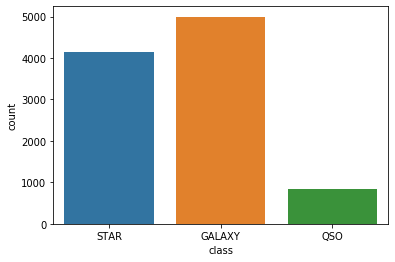

In [146]:
sns.countplot(data['class'])

In [147]:
data['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

In [148]:
data['rerun'].unique()

array([301], dtype=int64)

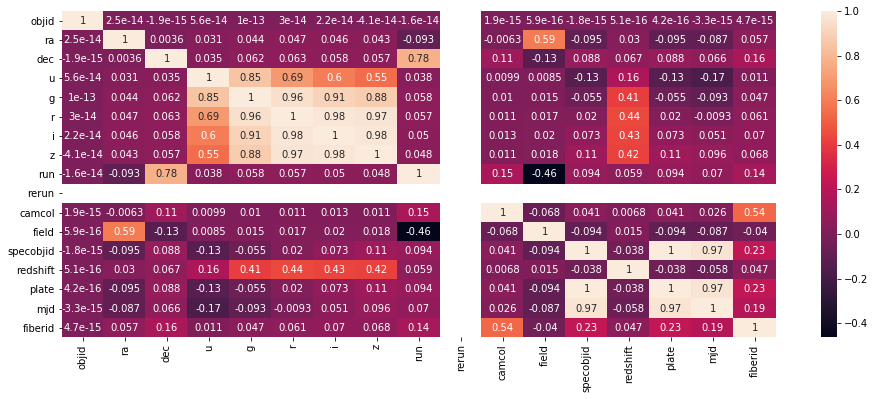

In [149]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

In [150]:
#rerun is dropped as it has no impact on the data
data.drop(['rerun'],axis=1,inplace=True)

In [151]:
data.describe()

,objid,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


In [152]:
data.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
camcol         int64
field          int64
specobjid    float64
redshift     float64
plate          int64
mjd            int64
fiberid        int64
class         object
dtype: object

In [153]:
#data conversion to binary
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['class']=le.fit_transform(data['class'])

In [154]:
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

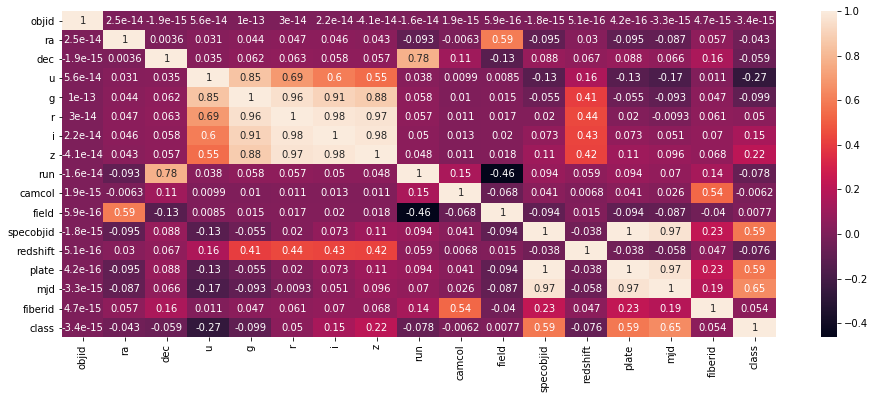

In [155]:
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),annot=True)

In [156]:
data['field'].value_counts()

301    62
302    58
304    56
305    55
309    54
       ..
499     1
676     1
507     1
660     1
503     1
Name: field, Length: 703, dtype: int64

In [157]:
data['run'].value_counts()

756     3060
752     2086
1345     915
1350     540
1140     527
745      453
1035     396
1412     347
1302     246
1331     245
1231     245
1334     212
1239     197
1336     182
1404     137
1045     112
1402      49
308       31
1411      10
1356       4
727        4
1119       1
1332       1
Name: run, dtype: int64

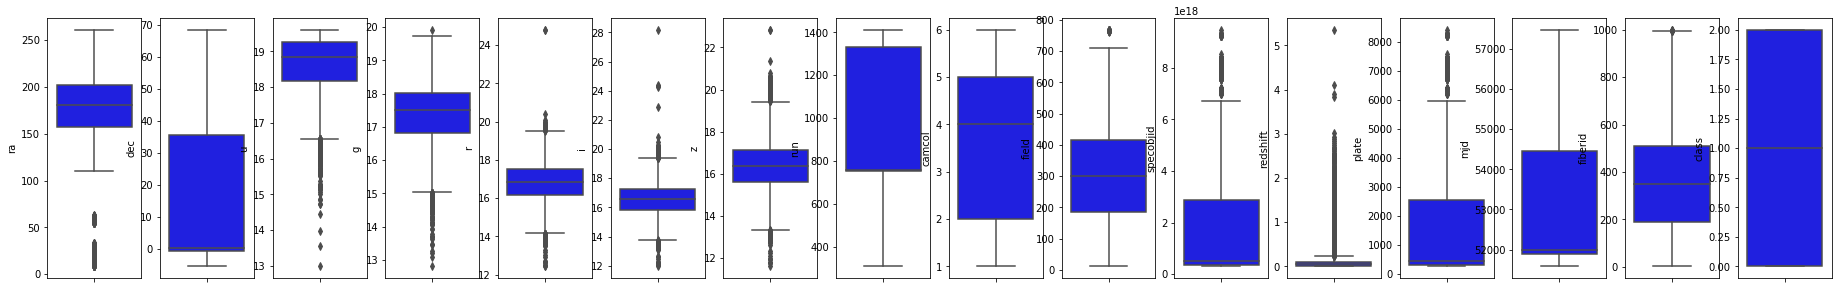

In [158]:
#Outlier detection
collist=data.columns.values
ncol=17
nrow=12
plt.figure(figsize=(2*ncol,4*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(data[collist[i]],color='blue',orient='v')

In [159]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
print(x.shape)
print(y.shape)

(10000, 16)
(10000,)


In [160]:
y=y.values.reshape(-1,1)

In [161]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x.shape

(10000, 16)

In [162]:
y

array([[2],
       [2],
       [0],
       ...,
       [2],
       [0],
       [0]])

In [163]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [164]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(7500, 16) (2500, 16)
(7500, 1) (2500, 1)


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_curve

In [173]:
gnb=GaussianNB()
knc=KNeighborsClassifier(n_neighbors=8)
svc=SVC()
dtc=DecisionTreeClassifier(random_state=6)
rfc=RandomForestClassifier(n_estimators=200,random_state=42)

In [174]:
models =[]
models.append(('GaussianNB',gnb))
models.append(('KNeighborsClassifer',knc))
models.append(('SVC',svc))
models.append(('DecisionTreeClassifier',dtc))
models.append(('RandomForestClassifier',rfc))

In [176]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('**************',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    score.append(AS*100)
    print('Accuracy Score =',AS)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix =',cm)
    clr=classification_report(y_test,pred)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score =',sc)
    cvs.append(sc*100)


************** GaussianNB ***********


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy Score = 0.932


Confusion Matrix = [[1203   40    7]
 [   9  203    0]
 [  95   19  924]]
Cross Val Score = 0.9411999999999999
************** KNeighborsClassifer ***********


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')


Accuracy Score = 0.8868


Confusion Matrix = [[1183    3   64]
 [  23  179   10]
 [ 182    1  855]]
Cross Val Score = 0.8921999999999999
************** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


Accuracy Score = 0.952


Confusion Matrix = [[1197    1   52]
 [  13  196    3]
 [  51    0  987]]
Cross Val Score = 

In [177]:
f_result=pd.DataFrame({'Model' : Model, 'Accuracy Score': score,'Cross_Val_Score':cvs})
f_result

,Model,Accuracy Score,Cross_Val_Score
0,GaussianNB,93.20,94.12
1,KNeighborsClassifer,88.68,89.22
2,SVC,95.20,95.73
3,DecisionTreeClassifier,98.80,98.42
4,RandomForestClassifier,99.04,98.88


In [178]:
#Random Forest is used as it gives the best accuracy and cross_val_score

In [181]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
df1=pd.DataFrame(pred)
df1.to_csv('Star_Galaxy_predicted_values.csv')
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(cross_val_score(rfc,x,y,cv=10,scoring='accuracy').mean())

0.9904
[[1236    5    9]
 [  10  202    0]
 [   0    0 1038]]
0.9888


In [182]:
from sklearn.externals import joblib
joblib.dump(rfc,'Stars_Galaxy_Prediction.pkl')

['Stars_Galaxy_Prediction.pkl']